Baseline Algorithm v1: Direct Search Clasification: DiSeCla

Descripción detallada del proceso:

Importación de bibliotecas: Se importan las bibliotecas necesarias: pandas para el manejo de datos, nltk para la tokenización de texto y re para manipulación de cadenas.

Cargar archivos: Se cargan los archivos CSV ("HS Code catalogue.csv" y "Validation Data.csv") en DataFrames.

Definir funciones de limpieza y tokenización: clean_text(): limpia el texto de números y signos de puntuación, y lo convierte a minúsculas.

tokenize(): divide el texto en palabras individuales (tokens).

Preprocesar el catálogo de códigos HS: Se limpian y tokenizan las descripciones del catálogo de códigos HS.

Iterar sobre los datos de validación: Se procesan las primeras 20 filas de los datos de validación, limpiando y tokenizando las entradas.

Contar coincidencias: Para cada token en la entrada de validación, se comparan con las descripciones del catálogo de códigos HS y se cuentan las coincidencias.

Determinar el mejor código HS: Se selecciona el código HS con el mayor número de coincidencias basadas en una operación de igualdad y se guarda junto con la descripción y el conteo.

Guardar resultados: Los resultados se almacenan en una lista, se convierten en un nuevo DataFrame y se guardan en un archivo CSV.

Mostrar resultados: Se imprime un vistazo de los primeros 20 registros del DataFrame resultante.


In [1]:
# Importar las bibliotecas necesarias
import pandas as pd  # Para manejar los datos en formato de DataFrame
import nltk  # Para la tokenización y procesamiento de texto
import re  # Para limpiar y manipular texto con expresiones regulares
from nltk.tokenize import word_tokenize  # Función para tokenizar el texto
nltk.download('punkt')  # Descargar el paquete necesario para la tokenización

# Cargar los archivos CSV en DataFrames
hs_code_catalogue_df = pd.read_csv(r'C:\Users\juan-\Documents\Proyecto Hacku AI\Repositorio GitHub página\proyecto_integrador_equipo_27\Avance3.27\data\HS code Catalogue_Processed.csv')
validation_data_df = pd.read_csv(r'C:\Users\juan-\Documents\Proyecto Hacku AI\Repositorio GitHub página\proyecto_integrador_equipo_27\Avance3.27\data\Validation Data.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juan-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import re
import random
import pandas as pd
from nltk.tokenize import word_tokenize

# Function to clean the text (removes numbers and punctuation)
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower()  # Convert text to lowercase

# Function to tokenize the text
def tokenize(text):
    return word_tokenize(text)  # Tokenize the text into individual words

# Preprocess the HS code catalogue descriptions
def preprocess_catalogue(hs_code_catalogue_df):
    hs_code_catalogue_df['cleaned_description'] = hs_code_catalogue_df['Full description'].apply(clean_text)  # Clean text
    hs_code_catalogue_df['tokens'] = hs_code_catalogue_df['cleaned_description'].apply(tokenize)  # Tokenize descriptions
    return hs_code_catalogue_df

# Function to run one iteration and return the result DataFrame
def run_iteration(hs_code_catalogue_df, validation_data_df):
    # Create a list to store the results of validation
    output_data = []

    # Select 20 random rows from validation_data_df
    random_indices = random.sample(range(len(validation_data_df)), min(20, len(validation_data_df)))

    # Iterate over the randomly selected entries
    for i in random_indices:
        raw_input = validation_data_df['Raw_data_input'].iloc[i]
        cleaned_text = clean_text(raw_input)
        tokens = tokenize(cleaned_text)

        match_counts = {}

        # Compare tokens with HS code descriptions
        for token in tokens:
            for j, row in hs_code_catalogue_df.iterrows():
                if token in row['tokens']:
                    if row['HS Code'] not in match_counts:
                        match_counts[row['HS Code']] = 0
                    match_counts[row['HS Code']] += 1

        if match_counts:
            best_hs_code = max(match_counts, key=match_counts.get)
            best_hs_code_description = hs_code_catalogue_df.loc[hs_code_catalogue_df['HS Code'] == best_hs_code, 'Full description'].values[0]
        else:
            best_hs_code = None
            best_hs_code_description = None

        hs_actual_from_validation = validation_data_df['Expected_output'].iloc[i]

        # Add the results to the output list
        output_data.append([
            raw_input,
            ' '.join(tokens),
            best_hs_code,
            best_hs_code_description,
            hs_actual_from_validation
        ])

    # Convert to DataFrame
    output_df = pd.DataFrame(output_data, columns=[
        'Raw_data_input',
        'Tokens',
        'Best_HS_Code',
        'Best_HS_Code_Description',
        'HS_Actual_from_validation'
    ])
    
    return output_df

# Example usage: Preprocess catalogue and run one iteration
hs_code_catalogue_df = preprocess_catalogue(hs_code_catalogue_df)
output_df = run_iteration(hs_code_catalogue_df, validation_data_df)

# Display first 10 rows of results
print(output_df.head(10))



                                      Raw_data_input  \
0  RAUVIS CRYSTAL 2800X1300X19 AS PER INVOICE7022...   
1  ALUMINIUM ALLOY LM6 INGOTTOTAL NET WEIGHT 1982...   
2  2352 PACKAGES LOADED ON 28 PALLETS FOODSTUFF -...   
3                      PAPEL BLANCO HS CODE 48025499   
4  SAID TO CONTAIN LINCUT HS CODE 82023100 EX KN ...   
5  03X40 CONTAINER WITH 98 CARTON BOXES WITH AUTO...   
6  FREIGHT PREPAIDSCAC CODE DMALTHIS MASTER BILL ...   
7  3X40HR SAID TO CONTAIN 60 PACKAGES 60 PACKAGES...   
8     SD233CF BAG PROPYLENE COPOLYMER HS CODE 390230   
9  38 CARDPALS 90566146 RUBBER GOODS  HS CODE 400...   

                                              Tokens Best_HS_Code  \
0           rauvis crystal xx as per invoice hs code   7013.22.00   
1  aluminium alloy lm ingottotal net weight kgshs...   4802.54.30   
2  packages loaded on pallets foodstuff rice hs c...   0406.20.10   
3                               papel blanco hs code   8471.90.10   
4           said to contain lincut hs 

Running iteration 1/50...
Running iteration 2/50...
Running iteration 3/50...
Running iteration 4/50...
Running iteration 5/50...
Running iteration 6/50...
Running iteration 7/50...
Running iteration 8/50...
Running iteration 9/50...
Running iteration 10/50...
Running iteration 11/50...
Running iteration 12/50...
Running iteration 13/50...
Running iteration 14/50...
Running iteration 15/50...
Running iteration 16/50...
Running iteration 17/50...
Running iteration 18/50...
Running iteration 19/50...
Running iteration 20/50...
Running iteration 21/50...
Running iteration 22/50...
Running iteration 23/50...
Running iteration 24/50...
Running iteration 25/50...
Running iteration 26/50...
Running iteration 27/50...
Running iteration 28/50...
Running iteration 29/50...
Running iteration 30/50...
Running iteration 31/50...
Running iteration 32/50...
Running iteration 33/50...
Running iteration 34/50...
Running iteration 35/50...
Running iteration 36/50...
Running iteration 37/50...
Running it

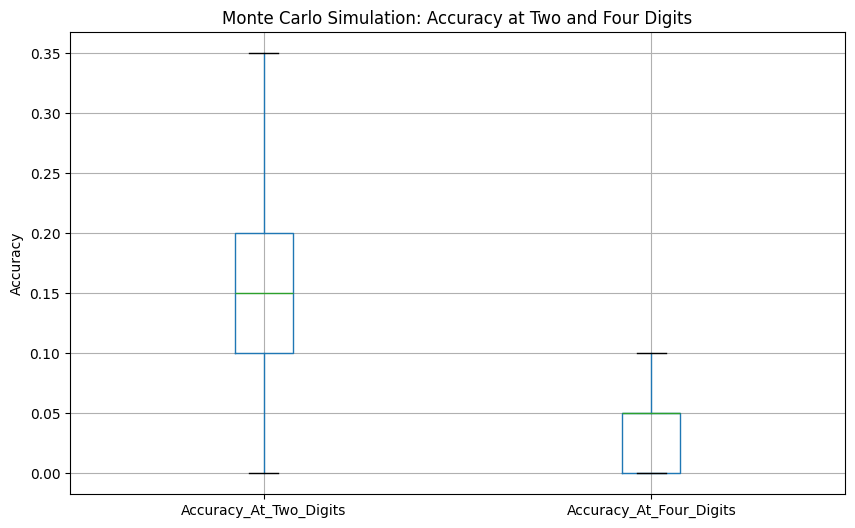

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate accuracy (both for 2 and 4 digits)
def calculate_accuracy(output_df):
    correct_two_digits = 0
    correct_four_digits = 0
    total = len(output_df)

    for index, row in output_df.iterrows():
        best_hs_code = str(row['Best_HS_Code'])[:4]
        hs_actual = str(row['HS_Actual_from_validation'])[:4]

        # Check 2-digit accuracy
        if best_hs_code[:2] == hs_actual[:2]:
            correct_two_digits += 1

        # Check 4-digit accuracy
        if best_hs_code == hs_actual:
            correct_four_digits += 1

    accuracy_at_two_digits = correct_two_digits / total if total > 0 else 0
    accuracy_at_four_digits = correct_four_digits / total if total > 0 else 0

    return accuracy_at_two_digits, accuracy_at_four_digits

# Higher-level function to run multiple iterations (Monte Carlo simulation)
def montecarlo_simulation(hs_code_catalogue_df, validation_data_df, n_iterations):
    results = []

    # Preprocess the catalogue
    hs_code_catalogue_df = preprocess_catalogue(hs_code_catalogue_df)

    # Run the simulation n_iterations times
    for iteration in range(n_iterations):
        print(f"Running iteration {iteration + 1}/{n_iterations}...")
        # Run one iteration
        output_df = run_iteration(hs_code_catalogue_df, validation_data_df)

        # Calculate accuracy
        acc_two_digits, acc_four_digits = calculate_accuracy(output_df)

        # Store the results
        results.append([iteration + 1, acc_two_digits, acc_four_digits])

    # Convert results to DataFrame for further analysis
    results_df = pd.DataFrame(results, columns=['Iteration', 'Accuracy_At_Two_Digits', 'Accuracy_At_Four_Digits'])

    return results_df

# Example usage: Running Monte Carlo simulation
results_df = montecarlo_simulation(hs_code_catalogue_df, validation_data_df, n_iterations=50)
print(results_df)

# Generate box plot to visualize accuracy distribution
plt.figure(figsize=(10, 6))
results_df[['Accuracy_At_Two_Digits', 'Accuracy_At_Four_Digits']].boxplot()
plt.title('Monte Carlo Simulation: Accuracy at Two and Four Digits')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
import random
import os  # Optional, to safely handle paths

# Generate a random 4-digit number
random_number = random.randint(1000, 9999)

# Define the output filename with the 4-digit randomizer
filename = f'output_tokensv1_{random_number}.csv'
output_directory = r'C:\Users\juan-\Downloads'

# Join the directory and filename to create the full file path
output_filename = os.path.join(output_directory, filename)

# Save the DataFrame to a CSV file with the randomized filename
output_df.to_csv(output_filename, index=False)

print(f"File saved as {output_filename}")
